 ## Spotify Top Hits Analysis

I've always been a big fan of music and Spotify so I decided to do an analysis on a Spotify Top Hits dataset. I have performed data cleaning on the dataset to ensure an accurate analysis.

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
#reading csv data file into a dataframe named songs
songs=pd.read_csv('../Data/cleaned_spotify.csv')

### Overview of the Data

In [3]:
#checking number of rows and columns in dataset
songs.shape

(1899, 8)

There are 1899 rows of data and 8 different columns

In [4]:
#looking at first couple rows in dataset
songs.head()

,Artist,Song,Year,Genre,Duration_mins,Popularity,Danceability,Valence
0,Britney Spears,Oops!...I Did It Again,2000,pop,3.52,77,0.751,0.894
1,Bon Jovi,It's My Life,2000,"rock, metal",3.74,78,0.551,0.544
2,*NSYNC,Bye Bye Bye,2000,pop,3.34,65,0.614,0.879
3,Eminem,The Real Slim Shady,2000,hip hop,4.74,86,0.949,0.760
4,Robbie Williams,Rock DJ,2000,"pop, rock",4.31,68,0.708,0.861


#### Column Variables
- Artist: Name of the artist
- Song: Name of the song
- Year: Release year of the song
- Genre: Genre of the song
- Duration_mins: Duration of the song in minutes
- Popularity: Popularity score of the song, values range from 0-92 in this dataset
- Danceability: Score that shows how danceable a song is, 0 being least danceable and 1 being most danceable
- Valence: Score from 0.0 to 1.0 that quantifies the degree of musical positivity expressed in a track.

### Questions I wanted to answer
1. What are the top 5 most popular songs?
2. What are the top 5 artists based on most hits?
3. What are the top 5 most popular genres?
    - 3.1 What is the trend of each of these genres over time?
    - 3.2 How danceable is each of these genres?
4. How has the average duration of songs changed over time?
5. How has the mood of songs changed over time?

### Question 1: What are the top 5 most popular songs in this dataset?

We will use the Popularity scores to rank how popular songs are 

In [5]:
#sorting songs in descending order by Popularity score
songs_desc=songs.sort_values(by='Popularity',ascending=False)

In [6]:
#subsetting columns since we don't need them all
songs_desc=songs_desc[['Artist','Song','Year','Genre','Popularity']]

In [7]:
songs_desc.head(15)

,Artist,Song,Year,Genre,Popularity
1240,The Neighbourhood,Sweater Weather,2013,"rock, pop",89
1229,Tom Odell,Another Love,2013,pop,88
160,Eminem,Without Me,2002,hip hop,87
3,Eminem,The Real Slim Shady,2000,hip hop,86
1723,Billie Eilish,lovely (with Khalid),2018,"pop, Dance/Electronic",86
1522,WILLOW,Wait a Minute!,2015,"pop, R&B, Dance/Electronic",86
1898,Post Malone,Circles,2019,hip hop,85
1428,Avicii,The Nights,2014,"pop, Dance/Electronic",85
1614,Ed Sheeran,Perfect,2017,pop,85
1147,Bruno Mars,Locked out of Heaven,2012,pop,85


There are songs that are tied in terms of Popularity score, so we will use dense rank to account for ties in popularity score. This means that there will be more than 5 songs when trying to rank the top 5 songs in terms of popularity.

In [8]:
#creating a rank column, that uses dense rank on the songs based on Popularity score.
songs_desc['Rank']=songs_desc['Popularity'].rank(method='dense',ascending=False)

In [9]:
songs_desc.head(15)

,Artist,Song,Year,Genre,Popularity,Rank
1240,The Neighbourhood,Sweater Weather,2013,"rock, pop",89,1.0
1229,Tom Odell,Another Love,2013,pop,88,2.0
160,Eminem,Without Me,2002,hip hop,87,3.0
3,Eminem,The Real Slim Shady,2000,hip hop,86,4.0
1723,Billie Eilish,lovely (with Khalid),2018,"pop, Dance/Electronic",86,4.0
1522,WILLOW,Wait a Minute!,2015,"pop, R&B, Dance/Electronic",86,4.0
1898,Post Malone,Circles,2019,hip hop,85,5.0
1428,Avicii,The Nights,2014,"pop, Dance/Electronic",85,5.0
1614,Ed Sheeran,Perfect,2017,pop,85,5.0
1147,Bruno Mars,Locked out of Heaven,2012,pop,85,5.0


In [10]:
#filtering to only songs with ranks 1-5
top5Songs=songs_desc[songs_desc['Rank']<=5]

In [11]:
top5Songs

,Artist,Song,Year,Genre,Popularity,Rank
1240,The Neighbourhood,Sweater Weather,2013,"rock, pop",89,1.0
1229,Tom Odell,Another Love,2013,pop,88,2.0
160,Eminem,Without Me,2002,hip hop,87,3.0
3,Eminem,The Real Slim Shady,2000,hip hop,86,4.0
1723,Billie Eilish,lovely (with Khalid),2018,"pop, Dance/Electronic",86,4.0
1522,WILLOW,Wait a Minute!,2015,"pop, R&B, Dance/Electronic",86,4.0
1898,Post Malone,Circles,2019,hip hop,85,5.0
1428,Avicii,The Nights,2014,"pop, Dance/Electronic",85,5.0
1614,Ed Sheeran,Perfect,2017,pop,85,5.0
1147,Bruno Mars,Locked out of Heaven,2012,pop,85,5.0


Based on the table, the top 5 most popular songs in this dataset are: 
1. Sweather Weather by The Neighbourhood with a score of 89
2. Another Love by Tom Odell with a score of 88
3. Without Me by Eminem with a score of 87
4. Songs tied for 4th with a score of 86
   - The Real Slim Shady by Eminem
   - lovely (with Khalid) by Billie Eilish
   - Wait a Minute! by WILLOW
5. Songs tied for 5th with a score of 85
   - Circles by Post Malone
   - The Nights by Avicii
   - Perfect by Ed Sheeran
   - Locked out of Heaven by Bruno Mars
   - 'Till I Collapse by Eminem
   - Daddy Issues by The Neighbourhood
  

### Question 2: Top 5 artists with the most hits?

In [12]:
#grouping songs by artist and counting number of songs, sorted result by song count in descending order
artist_hits= songs.groupby('Artist').Song.count().to_frame('Num_Songs').reset_index().sort_values('Num_Songs',ascending=False)

In [13]:
artist_hits.head(15)

,Artist,Num_Songs
620,Rihanna,23
217,Drake,23
236,Eminem,21
127,Calvin Harris,20
118,Britney Spears,18
195,David Guetta,18
388,Katy Perry,16
708,Taylor Swift,16
156,Chris Brown,16
90,Beyoncé,16


There are a lot of artists that are tied in terms of number of songs, so we will use a dense rank to account for ties. This also means that there will be more than 5 artists when trying to rank the top 5 in terms of most hit appearances.

In [14]:
#creating a rank column, that uses dense rank on the artists based on number of top hit songs.
artist_hits['Rank']=artist_hits['Num_Songs'].rank(method='dense',ascending=False)

In [15]:
artist_hits.head(15)

,Artist,Num_Songs,Rank
620,Rihanna,23,1.0
217,Drake,23,1.0
236,Eminem,21,2.0
127,Calvin Harris,20,3.0
118,Britney Spears,18,4.0
195,David Guetta,18,4.0
388,Katy Perry,16,5.0
708,Taylor Swift,16,5.0
156,Chris Brown,16,5.0
90,Beyoncé,16,5.0


In [16]:
#filtering to only artists with ranks 1-5
top5Artists=artist_hits[artist_hits['Rank']<=5]

In [17]:
top5Artists

,Artist,Num_Songs,Rank
620,Rihanna,23,1.0
217,Drake,23,1.0
236,Eminem,21,2.0
127,Calvin Harris,20,3.0
118,Britney Spears,18,4.0
195,David Guetta,18,4.0
388,Katy Perry,16,5.0
708,Taylor Swift,16,5.0
156,Chris Brown,16,5.0
90,Beyoncé,16,5.0


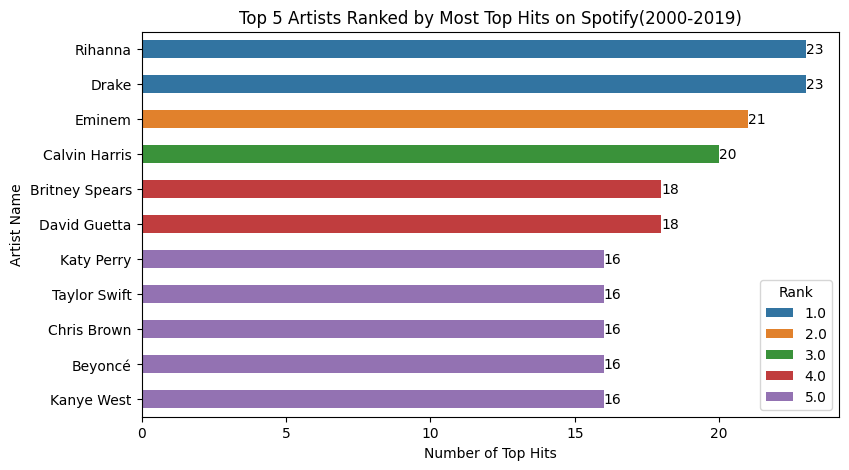

In [18]:
#plotting result as a bar graph 
plt.figure(figsize=(9,5))
ax=sns.barplot(x='Num_Songs',y='Artist',hue='Rank',data=top5Artists,width=.5,dodge=False)
plt.xlabel('Number of Top Hits')
plt.ylabel('Artist Name')
plt.title('Top 5 Artists Ranked by Most Top Hits on Spotify(2000-2019)')
for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

Looking at the bar chart the top 5 artists with the most top hits are:
1. Artists tied for 1st with 23 hits
    - Rihanna
    - Drake
2. Eminem with 21 hits
3. Calvin Harris with 20 hits
4. Artists tied for 4th with 18 hits
    - Britney Spears
    - David Guetta
5. Artists tied for 5th with 16 hits
    - Katy Perry
    - Taylor Swift
    - Chris Brown
    - Beyoncé
    - Kanye West

### Question 3: What is the top 5 most popular genres?

In [19]:
#look at how genres are displayed
songs.Genre.head(10)

0                  pop
1          rock, metal
2                  pop
3              hip hop
4            pop, rock
5     Dance/Electronic
6                  pop
7                  pop
8    hip hop, pop, R&B
9                  pop
Name: Genre, dtype: object

We want to store the counts of genres in a dictionary. The problem is in the songs DataFrame, the genre column contains genre information as a single string with commas separating the value if there is more than one genre, making it challenging to count individual genres accurately with a dictionary. To resolve this issue, we'll convert the genre column from a single string to a list of strings. This transformation will enable us to use a dictionary to count each genre separately even if there are multiple genres for a song.

In [20]:
#creating a dictionary to score genre counts
genre_count={}

In [21]:
#function to turn genre column from a string of genres separted by commas into a list of genres
def genre_to_list(genre):
    # Split the input genre string by commas to create a list of genre strings.
    list_genre=genre.split(',')
    # Remove leading and trailing whitespaces from each genre string in list
    cleaned_genre_list=[i.strip() for i in list_genre]
    return cleaned_genre_list

In [22]:
#applying function to the Genre column in the songs dataframe
songs['Genre']=songs['Genre'].apply(genre_to_list)

In [23]:
songs['Genre']

0                    [pop]
1            [rock, metal]
2                    [pop]
3                [hip hop]
4              [pop, rock]
               ...        
1894                 [pop]
1895                 [pop]
1896    [hip hop, country]
1897                 [pop]
1898             [hip hop]
Name: Genre, Length: 1899, dtype: object

In [24]:
#counting each genre using the genre_count dictionary we created and the updated Genre column 
genre_column=songs['Genre']
for genres in genre_column:
    for genre in genres:
        if genre in genre_count:
            genre_count[genre]+=1
        else:
            genre_count[genre]=1
    

In [25]:
genre_count

{'pop': 1550,
 'rock': 217,
 'metal': 61,
 'hip hop': 741,
 'Dance/Electronic': 377,
 'R&B': 428,
 'country': 19,
 'latin': 60,
 'Folk/Acoustic': 19,
 'easy listening': 6,
 'World/Traditional': 9,
 'set()': 21,
 'blues': 3,
 'jazz': 2,
 'classical': 1}

Since there seems to be no ties in the top 5 we won't have to use dense rank like we did for the previous questions to account for ties.

In [26]:
#sorting the genre_count dictionary and reversing it to get biggest genres first
#then getting the first 5 items to get the top 5 genres in terms of count
top5Genre={k: v for k, v in sorted(genre_count.items(),key=lambda x: x[1],reverse=True)[:5]}
top5Genre

{'pop': 1550, 'hip hop': 741, 'R&B': 428, 'Dance/Electronic': 377, 'rock': 217}

In [27]:
#labels and values variable for the bar graph which represent the keys(genre of the song) and values(count of each genre) in the genre count dictionary
labels=top5Genre.keys()
values=top5Genre.values()

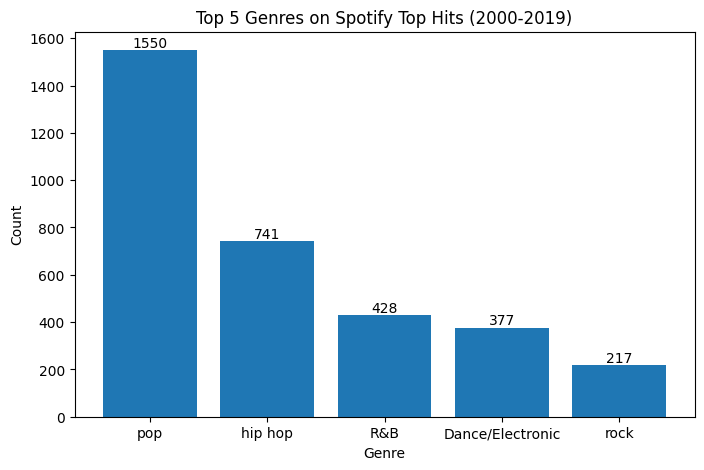

In [28]:
#plotting result as a bar graph
plt.figure(figsize=(8,5))
bars=plt.bar(labels,values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 5 Genres on Spotify Top Hits (2000-2019)')
plt.bar_label(bars,label_type='edge')

plt.show()

Looking at the bar chart, the top 5 genres are
1. Pop with 1550 songs
2. Hip Hop with 741 songs
3. R&B with 428 songs
4. Dance/Electronic with 377 songs
5. Rock with 217 songs

The numbers might not seem to add up since we have 1899 rows of songs, and we are way over 1899 just with the top 5, but remember that alot of these songs have more than one genre.

### Question 3.1: What is the trend each of these 5 genres over the years?

We will use line charts and trendlines/linear regression to understand the trend of the genres

In [29]:
#filter to pop songs
pop_songs=songs.loc[songs['Genre'].apply(lambda x: 'pop' in x)]
pop_songs.head(5)

,Artist,Song,Year,Genre,Duration_mins,Popularity,Danceability,Valence
0,Britney Spears,Oops!...I Did It Again,2000,[pop],3.52,77,0.751,0.894
2,*NSYNC,Bye Bye Bye,2000,[pop],3.34,65,0.614,0.879
4,Robbie Williams,Rock DJ,2000,"[pop, rock]",4.31,68,0.708,0.861
6,Gigi D'Agostino,L'Amour Toujours,2011,[pop],3.98,1,0.617,0.808
7,Bomfunk MC's,Freestyler,2000,[pop],5.11,55,0.822,0.568


In [30]:
#grouping pop songs by year and counting number of songs each year
pop_trend=pop_songs.groupby('Year')['Genre'].count()
pop_trend

Year
2000     55
2001     90
2002     70
2003     73
2004     65
2005     78
2006     73
2007     68
2008     79
2009     66
2010     94
2011     81
2012    102
2013     70
2014     93
2015     83
2016     87
2017     87
2018     73
2019     63
Name: Genre, dtype: int64

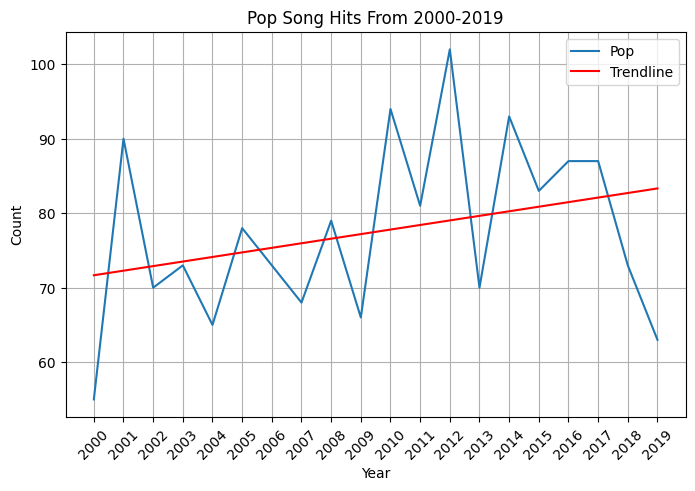

In [31]:
#displaying result as a linechart showing number of pop songs each year from 2000-2019 with a trendline
plt.figure(figsize=(8,5))
plt.plot(pop_trend.index,pop_trend,label='Pop')
coeffs=np.polyfit(pop_trend.index,pop_trend,1)
trendline=np.poly1d(coeffs)
x_values=np.linspace(pop_trend.index.min(),pop_trend.index.max(),100)
plt.plot(x_values,trendline(x_values),color='red',label='Trendline')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(pop_trend.index,rotation=45)
plt.title('Pop Song Hits From 2000-2019')
plt.grid(True)

plt.legend()
plt.show()

In [32]:
#equation for the pop trendline
pop_equation = f'Trendline: y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}'
#calculating r squared value of pop trendline to check if the trendline holds any significance
y_pred = trendline(pop_trend.index)
#r2_score function is from the sk_learn library
pop_r_squared = r2_score(pop_trend, y_pred)
pop_r_squared_text=f'r_squared_value = {pop_r_squared:.2f}'

In [33]:
pop_equation, pop_r_squared_text

('Trendline: y = 0.61x + -1155.40', 'r_squared_value = 0.09')

The trend of Pop is unclear as seen in the graph with many years having drastic increases or decreases in number of hits, this is further backed up by the weak r squared value of 0.09 when trying to create a trendline for the linechart. (An R-squared value of 0.09 is considered weak because it means that the trendline explains only a small part, about 9 percent, of how the data points vary on the line chart.) Overall Pop went from 55 hits in 2000 (which is also its lowest point) in hits to 63 in 2019, so a slight increase. It peaked in 2012 with 102 hits. 

Since the r squared value of the trendline so weak, its better to leave it out of the chart since it does not provide an adequate representaion of the trend of the line chart and may cause misinformation. 

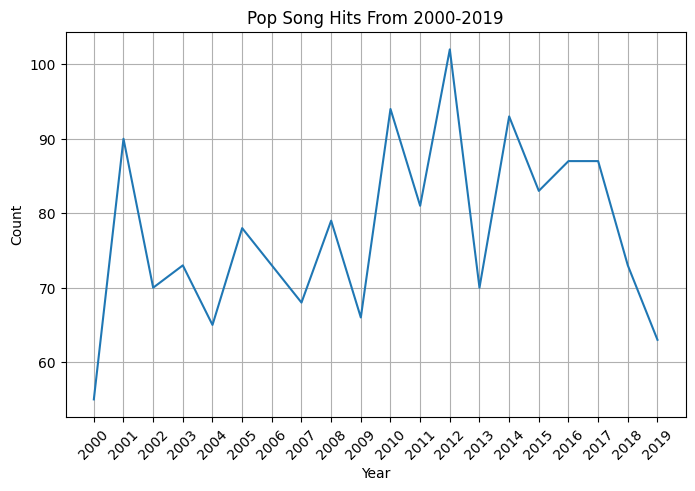

In [34]:
#pop line chart without trendline
plt.figure(figsize=(8,5))
plt.plot(pop_trend.index,pop_trend,label='Pop')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(pop_trend.index,rotation=45)
plt.title('Pop Song Hits From 2000-2019')
plt.grid(True)

plt.show()

In [35]:
#filter to hip hop songs
hip_hop_songs=songs.loc[songs['Genre'].apply(lambda x: 'hip hop' in x)]
hip_hop_songs.head(5)

,Artist,Song,Year,Genre,Duration_mins,Popularity,Danceability,Valence
3,Eminem,The Real Slim Shady,2000,[hip hop],4.74,86,0.949,0.760
8,Aaliyah,Try Again,2002,"[hip hop, pop, R&B]",4.73,53,0.797,0.731
12,M.O.P.,Cold as Ice,2000,[hip hop],4.07,54,0.656,0.758
15,Da Brat,What'chu Like (feat. Tyrese),2000,"[hip hop, pop, R&B]",3.69,53,0.879,0.817
25,Bow Wow,Bounce With Me (feat. Xscape) - Edited Album V...,2000,"[hip hop, pop, R&B]",2.93,36,0.852,0.934


In [36]:
#grouping hip hop songs by year and counting number of songs each year
hip_hop_trend=hip_hop_songs.groupby('Year')['Genre'].count()
hip_hop_trend

Year
2000    20
2001    32
2002    44
2003    32
2004    42
2005    50
2006    27
2007    38
2008    32
2009    33
2010    52
2011    46
2012    44
2013    26
2014    29
2015    29
2016    38
2017    41
2018    48
2019    38
Name: Genre, dtype: int64

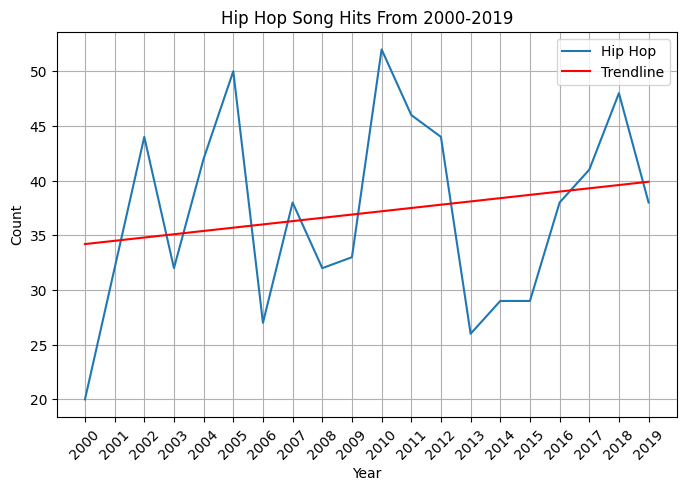

In [37]:
#displaying result as a linechart showing number of hip hop songs each year from 2000-2019 with a trendline
plt.figure(figsize=(8,5))
plt.plot(hip_hop_trend.index,hip_hop_trend,label='Hip Hop')
coeffs=np.polyfit(hip_hop_trend.index,hip_hop_trend,1)
trendline=np.poly1d(coeffs)
x_values=np.linspace(hip_hop_trend.index.min(),hip_hop_trend.index.max(),100)
plt.plot(x_values,trendline(x_values),color='red',label='Trendline')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(hip_hop_trend.index,rotation=45)
plt.title('Hip Hop Song Hits From 2000-2019')
plt.grid(True)
plt.legend()
plt.show()

In [38]:
#equation for hip hop trendline
hip_hop_equation= f'Trendline: y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}'
#calculating r squared value of hip hop trendline
y_pred = trendline(hip_hop_trend.index)
hip_hop_r_squared = r2_score(hip_hop_trend, y_pred)
hip_hop_r_squared_text=f'r_squared_value = {hip_hop_r_squared:.2f}'

In [39]:
hip_hop_equation, hip_hop_r_squared_text

('Trendline: y = 0.30x + -565.80', 'r_squared_value = 0.04')

Hip Hop like Pop has drastic increases and decreases in number of hits each year leading to an unclear trend as seen with the graph and the weak r squared value of 0.04 for the trendline. Overall Hip Hop numbers have gone up from  20 hits in 2000 which was also its lowest point to 38 hits in 2019. It peaked in 2010 with 52 songs.

Replotting the chart without the trendline is probably a better idea due to the weak r2 value.

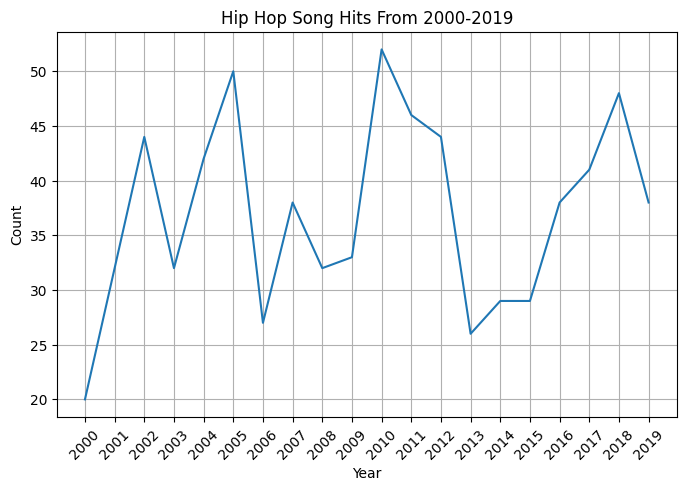

In [40]:
#hip hop line chart without the trendline
plt.figure(figsize=(8,5))
plt.plot(hip_hop_trend.index,hip_hop_trend,label='Hip Hop')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(hip_hop_trend.index,rotation=45)
plt.title('Hip Hop Song Hits From 2000-2019')
plt.grid(True)

plt.show()

In [41]:
#filter to rnb songs
rnb_songs=songs.loc[songs['Genre'].apply(lambda x: 'R&B' in x)]
rnb_songs.head(5)

,Artist,Song,Year,Genre,Duration_mins,Popularity,Danceability,Valence
8,Aaliyah,Try Again,2002,"[hip hop, pop, R&B]",4.73,53,0.797,0.731
15,Da Brat,What'chu Like (feat. Tyrese),2000,"[hip hop, pop, R&B]",3.69,53,0.879,0.817
18,Debelah Morgan,Dance with Me,2000,"[pop, R&B]",3.67,49,0.850,0.740
20,Ruff Endz,No More,2000,[R&B],4.04,52,0.839,0.927
23,Avant,Separated,2000,"[pop, R&B]",4.26,55,0.798,0.643


In [42]:
#grouping rnb songs by year and counting number of songs each year
rnb_trend=rnb_songs.groupby('Year')['Genre'].count()
rnb_trend

Year
2000    24
2001    35
2002    31
2003    32
2004    30
2005    30
2006    28
2007    33
2008    35
2009    22
2010    22
2011    19
2012    10
2013     8
2014     9
2015    19
2016    19
2017     3
2018    10
2019     9
Name: Genre, dtype: int64

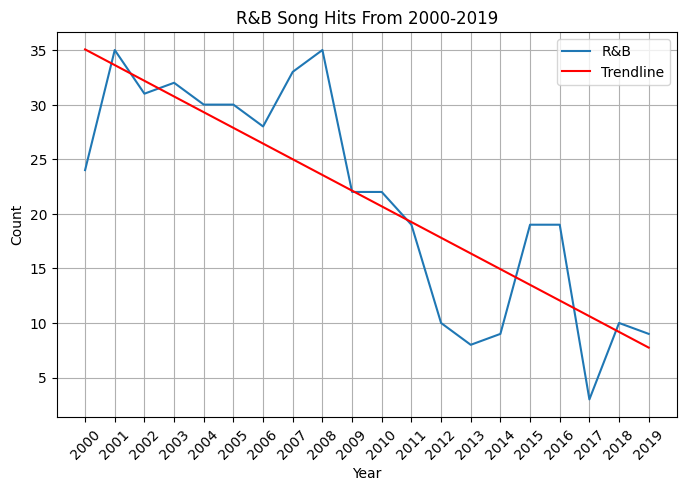

In [43]:
#displaying result as a linechart for number of rnb songs each year from 2000-2019 with a trendline
plt.figure(figsize=(8,5))
plt.plot(rnb_trend.index,rnb_trend,label='R&B')
coeffs=np.polyfit(rnb_trend.index,rnb_trend,1)
trendline=np.poly1d(coeffs)
x_values=np.linspace(rnb_trend.index.min(),rnb_trend.index.max(),100)
plt.plot(x_values,trendline(x_values),color='red',label='Trendline')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rnb_trend.index,rotation=45)
plt.title('R&B Song Hits From 2000-2019')
plt.grid(True)
plt.legend()

plt.show()

In [44]:
#equation for rnb trendline
rnb_equation= f'Trendline: y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}'
#calculating r squared value of rnb trendline
y_pred = trendline(rnb_trend.index)
rnb_r_squared = r2_score(rnb_trend, y_pred)
rnb_r_squared_text=f'r_squared_value = {rnb_r_squared:.2f}'

In [45]:
rnb_equation, rnb_r_squared_text

('Trendline: y = -1.44x + 2910.25', 'r_squared_value = 0.68')

R&B has has been mostly trending downwards as seen in the graph and also the trendline equation with a moderately strong r^2 value of 0.68. *(R squared value of 0.68 is moderately strong since it means the trendline represents 68 percent of the data variance in the line chart)* R&B started with 24 hits in 2000 and now only have 9 hits in 2019. It peaked in 2008 with 35 songs and its lowest point was in 2017 with only 3 hits.

In [46]:
#filter to edm (dance/electronic) songs and counting number of songs each year
edm_songs=songs.loc[songs['Genre'].apply(lambda x: 'Dance/Electronic' in x)]
edm_songs.head(5)

,Artist,Song,Year,Genre,Duration_mins,Popularity,Danceability,Valence
5,Modjo,Lady - Hear Me Tonight,2001,[Dance/Electronic],5.12,77,0.720,0.869
14,Darude,Sandstorm,2001,"[pop, Dance/Electronic]",3.76,69,0.528,0.587
16,Moloko,The Time Is Now,2000,"[pop, Dance/Electronic]",5.30,54,0.682,0.546
17,Chicane,Don't Give Up,2016,[Dance/Electronic],3.51,47,0.644,0.530
21,Kylie Minogue,Spinning Around,2000,"[pop, Dance/Electronic]",3.46,55,0.761,0.631


In [47]:
#grouping edm songs by year and counting 
edm_trend=edm_songs.groupby('Year')['Genre'].count()
edm_trend

Year
2000     4
2001    12
2002     3
2003    10
2004     9
2005     5
2006     6
2007     8
2008     7
2009    12
2010    28
2011    25
2012    36
2013    25
2014    38
2015    28
2016    42
2017    29
2018    29
2019    21
Name: Genre, dtype: int64

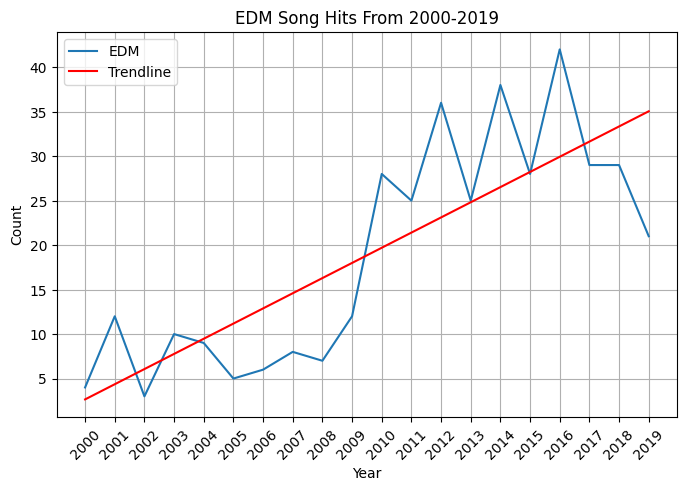

In [48]:
#displaying result as a linechart of number of edm songs each year from 2000-2019 with a trendline
plt.figure(figsize=(8,5))
plt.plot(edm_trend.index,edm_trend,label='EDM')
coeffs=np.polyfit(edm_trend.index,edm_trend,1)
trendline=np.poly1d(coeffs)
x_values=np.linspace(edm_trend.index.min(),edm_trend.index.max(),100)
plt.plot(x_values,trendline(x_values),color='red',label='Trendline')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(edm_trend.index,rotation=45)
plt.title('EDM Song Hits From 2000-2019')
plt.grid(True)
plt.legend()

plt.show()

In [49]:
#equation for edm trendline
edm_equation= f'Trendline: y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}'
#calculating r squared value of edm trendline
y_pred = trendline(edm_trend.index)
edm_r_squared = r2_score(edm_trend, y_pred)
edm_r_squared_text=f'r_squared_value = {edm_r_squared:.2f}'

In [50]:
edm_equation, edm_r_squared_text

('Trendline: y = 1.70x + -3406.37', 'r_squared_value = 0.64')

EDM (Dance/Electronic) has had an overall upward trend in number of hits each year as seen in the chart and with the positive trendline that has a slightly strong r squared value of 0.64. EDM started with a meager 4 hits in 2000 to now having 21 hits in 2019. Edm peaked in 2016 with  42 hits and 2002 was the roughtest year with only 3 hits. Looking at the graph carefully, it seems that after the peak in 2016, EDM is starting to fall off again with the recent decreases in the last 3 years.

In [51]:
#filter to rock songs
rock_songs=songs.loc[songs['Genre'].apply(lambda x: 'rock' in x)]
rock_songs.head(5)

,Artist,Song,Year,Genre,Duration_mins,Popularity,Danceability,Valence
1,Bon Jovi,It's My Life,2000,"[rock, metal]",3.74,78,0.551,0.544
4,Robbie Williams,Rock DJ,2000,"[pop, rock]",4.31,68,0.708,0.861
10,Linkin Park,In the End,2000,"[rock, metal]",3.61,83,0.556,0.400
36,Oasis,Go Let It Out,2000,"[Folk/Acoustic, rock]",4.64,0,0.408,0.628
47,Ronan Keating,Life Is A Rollercoaster,2000,"[pop, rock]",3.91,59,0.655,0.862


In [52]:
#grouping rock songs by year and counting number of songs each year
rock_trend=rock_songs.groupby('Year')['Genre'].count()
rock_trend

Year
2000    12
2001    16
2002    13
2003    13
2004    11
2005    18
2006    14
2007    19
2008    13
2009     9
2010     6
2011    12
2012    11
2013     7
2014     6
2015    13
2016     7
2017     7
2018     8
2019     2
Name: Genre, dtype: int64

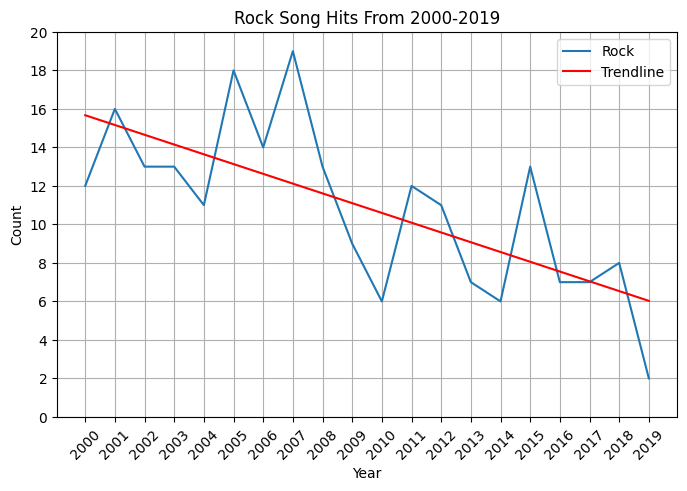

In [53]:
#displaying result as a linechart for number of rock songs each year from 2000-2019 with a trendline
plt.figure(figsize=(8,5))
plt.plot(rock_trend.index,rock_trend,label='Rock')
coeffs=np.polyfit(rock_trend.index,rock_trend,1)
trendline=np.poly1d(coeffs)
x_values=np.linspace(rock_trend.index.min(),rock_trend.index.max(),100)
plt.plot(x_values,trendline(x_values),color='red',label='Trendline')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rock_trend.index,rotation=45)
plt.yticks(range(0,22,2))
plt.title('Rock Song Hits From 2000-2019')
plt.grid(True)
plt.legend()
plt.show()

In [54]:
#equation for rock trendline
rock_equation= f'Trendline: y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}'
#calculating r squared value of rock trendline to check if it holds significance 
y_pred = trendline(rock_trend.index)
rock_r_squared = r2_score(rock_trend, y_pred)
rock_r_squared_text=f'r_squared_value = {rock_r_squared:.2f}'

In [55]:
rock_equation, rock_r_squared_text

('Trendline: y = -0.51x + 1030.71', 'r_squared_value = 0.48')

Rock has trend is a little unclear as seen with some of the unpredictable increases and decreases in number of hits which are very noticeable from 2005-2011 and a fairly weak r squared value of 0.48 for the trendline. Overall Rock has went down from having 12 hits in 2000 to only 2 hits in 2019 which also is it's worst year. Rock's best year was in 2007 with 19 hits.

To avoid misinformation, its probably better to replot the line chart wihtout the trendline since it really only represents 48 percent of how the data points vary in the line chart.

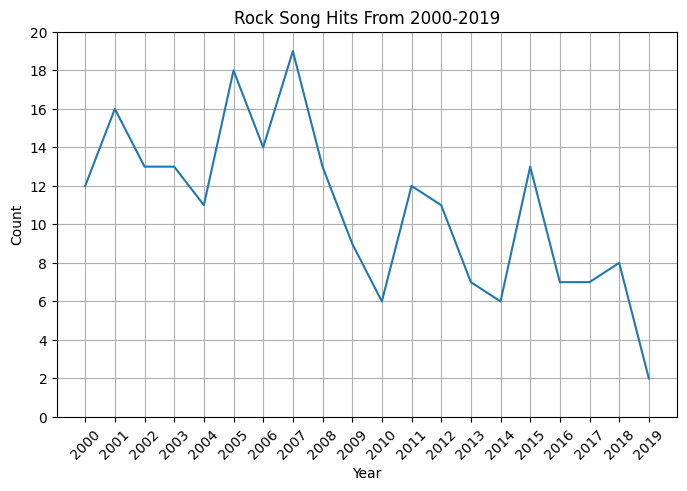

In [56]:
#rock line chart without the trendline
plt.figure(figsize=(8,5))
plt.plot(rock_trend.index,rock_trend,label='Rock')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rock_trend.index,rotation=45)
plt.yticks(range(0,22,2))
plt.title('Rock Song Hits From 2000-2019')
plt.grid(True)

plt.show()

### Question 3.2: How danceable is each of these 5 genres?

Before we dive into the danceabilty of each of these 5 genres, I wanted to see the overall distribution of danceability values.

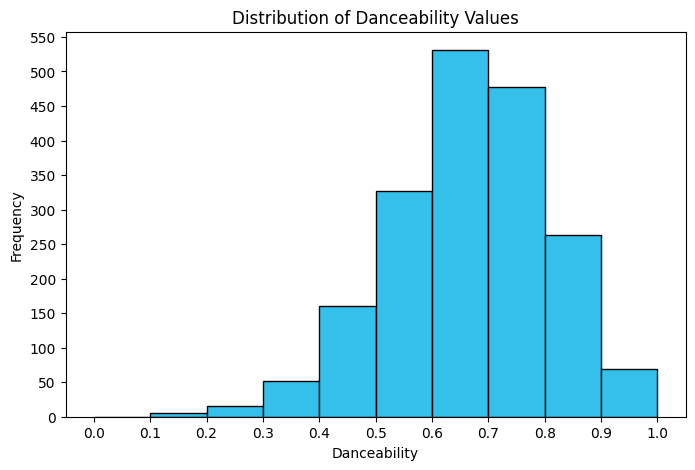

In [57]:
#creating histogram to see distribution of danceability values
plt.figure(figsize=(8,5))
bins=np.linspace(0,1,num=11)
plt.hist(songs['Danceability'],bins=bins,edgecolor='black',color='#34c0eb')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.xticks(np.arange(0,1.1,.1))
plt.yticks(range(0,600,50))
plt.title('Distribution of Danceability Values')
plt.show()

The majority of songs have a danceability value between 0.5-0.8. There are a good number of songs in 0.4-0.5 range and 0.8-0.9 range. Not many songs lie within 0.3-0.4 and 0.9-1.0 range. Very few songs in the 0.1-0.3 range.  

In [58]:
#taking the overall average of each of the genres rounded to the nearest 2nd decimal
pop_dance=round(pop_songs.Danceability.mean(),2)
hip_hop_dance=round(hip_hop_songs.Danceability.mean(),2)
rnb_dance=round(rnb_songs.Danceability.mean(),2)
edm_dance=round(edm_songs.Danceability.mean(),2)
rock_dance=round(rock_songs.Danceability.mean(),2)

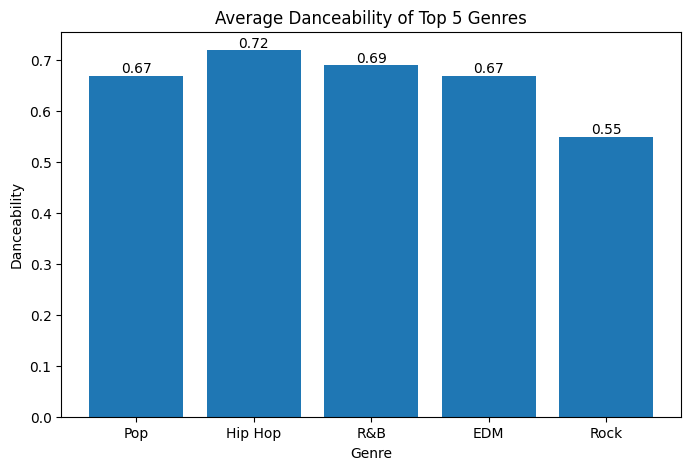

In [59]:
#plotting the averages on a bar graph
plt.figure(figsize=(8,5))
labels=['Pop','Hip Hop','R&B', 'EDM','Rock']
values=[pop_dance,hip_hop_dance,rnb_dance,edm_dance,rock_dance]
bars=plt.bar(labels,values)
plt.xlabel('Genre')
plt.ylabel('Danceability')
plt.title('Average Danceability of Top 5 Genres')
plt.bar_label(bars,label_type='edge')

plt.show()

Hip Hop is the most danceable genre out of the 5 most popular genres with average score of 0.72. Rock is the least danceable with a score of 0.55. Overall the average danceablility of Pop, Hip Hop. R&B and EDM are very similar with maximum difference being only 0.05 points. These 4 genres danceability values also all fall into the mode (highest frequency) of the danceability histogram (the previous chart) being the 0.6-0.7 range. Rock's danceabiltiy sticks out more as it is lot lower than the other 4 with a maximum difference of 0.17 points. Using the danceability scale (0-1) I can say that Pop, Hip Hop, R&B and EDM are all fairly danceable genres while Rock is ok but more neutral.

### Question 4: How has the average duration of songs changed over time?

In [60]:
#grouping songs by year and getting the overall average duration of the songs for each year
average_duration= songs.groupby('Year')['Duration_mins'].mean()

In [61]:
#rounding the averages to the nearest 2nd decimal place
average_duration=average_duration.apply(lambda x: round(x,2))

In [62]:
average_duration

Year
2000    4.18
2001    4.05
2002    4.20
2003    3.94
2004    3.89
2005    3.96
2006    3.97
2007    3.87
2008    3.91
2009    3.93
2010    3.68
2011    3.81
2012    3.73
2013    3.85
2014    3.66
2015    3.65
2016    3.67
2017    3.54
2018    3.47
2019    3.28
Name: Duration_mins, dtype: float64

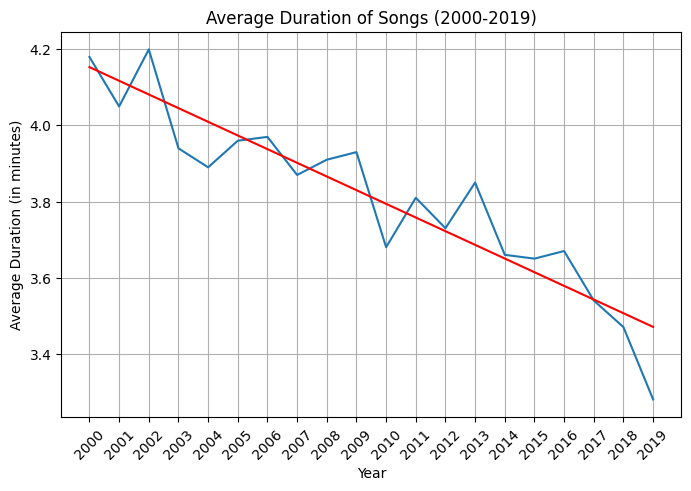

In [63]:
#plotting the average duration of songs each year from 2000-2019 with a trendline
plt.figure(figsize=(8,5))
plt.plot(average_duration.index,average_duration)
coeffs=np.polyfit(average_duration.index,average_duration,1)
trendline=np.poly1d(coeffs)
x_values=np.linspace(average_duration.index.min(),average_duration.index.max(),100)
plt.plot(x_values,trendline(x_values),color='red',label='Trendline')
plt.xlabel('Year')
plt.ylabel('Average Duration (in minutes)')
plt.title('Average Duration of Songs (2000-2019)')
plt.xticks(average_duration.index,rotation=45)
plt.grid(True)

plt.show()

In [64]:
#equation for average duration over time trendline
average_duration_equation= f'Trendline: y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}'
#calculating r squared value of average duration over time trendline
y_pred = trendline(average_duration.index)
average_duration_r_squared = r2_score(average_duration, y_pred)
average_duration_r_squared_text=f'r_squared_value = {average_duration_r_squared:.2f}'

In [65]:
average_duration_equation, average_duration_r_squared_text

('Trendline: y = -0.04x + 76.03', 'r_squared_value = 0.85')

Based on the line graph and the trendline the average duration of songs seems to be gradually decreasing over time. More precisely the trendline with a strong r squared value of 0.85 says that the average duration of songs is decreasing by 0.04 minutes or 2.5 seconds each year. Overall the average duration of songs has gone down from 4.18 minutes in 2000 to 3.28 minutes in 2019 which also is the lowest point. The average duration peaked in 2002 with a duration of 4.2 minutes. My conclusive insight is that songs are getting shorter and shorter in length after each year.

### Question 5: How has the overall mood of songs changed over time?

Since valence score measures positivity we will be using that to measure the mood. Valence score range is 0-1.

In [66]:
#grouping songs by year and taking average valence of songs for each year
average_valence=songs.groupby('Year')['Valence'].mean()

In [67]:
#rounding averages to the 2nd decimal place
average_valence=average_valence.apply(lambda x: round(x,2))

In [68]:
average_valence

Year
2000    0.65
2001    0.66
2002    0.58
2003    0.61
2004    0.61
2005    0.55
2006    0.60
2007    0.55
2008    0.56
2009    0.57
2010    0.57
2011    0.53
2012    0.56
2013    0.48
2014    0.52
2015    0.49
2016    0.49
2017    0.48
2018    0.47
2019    0.54
Name: Valence, dtype: float64

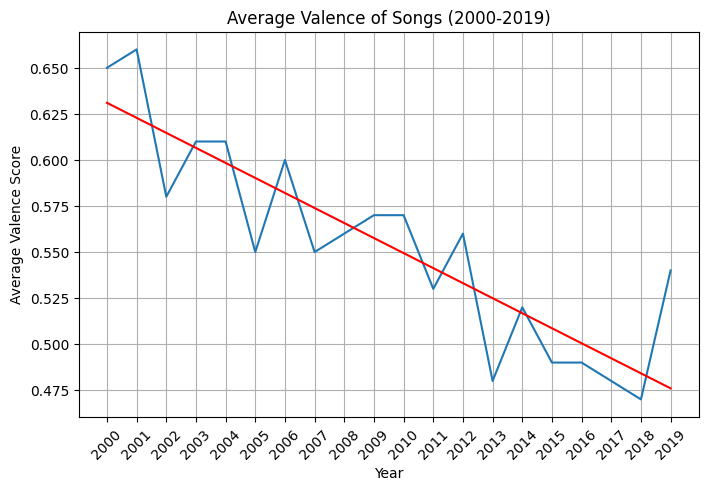

In [69]:
#plotting the average valence of songs each year from 2000-2019 on a line graph with a trendline
plt.figure(figsize=(8,5))
plt.plot(average_valence.index,average_valence)
coeffs=np.polyfit(average_valence.index,average_valence,1)
trendline=np.poly1d(coeffs)
x_values=np.linspace(average_valence.index.min(),average_valence.index.max(),100)
plt.plot(x_values,trendline(x_values),color='red',label='Trendline')
plt.xlabel('Year')
plt.ylabel('Average Valence Score')
plt.title('Average Valence of Songs (2000-2019)')
plt.xticks(average_valence.index,rotation=45)
plt.grid(True)

plt.show()

In [70]:
#equation for average valence over time trendline
average_valence_equation= f'Trendline: y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}'
#calculating r squared value of average valence over time trendline
y_pred = trendline(average_valence.index)
average_valence_r_squared = r2_score(average_valence, y_pred)
average_valence_r_squared_text=f'r_squared_value = {average_valence_r_squared:.2f}'

In [71]:
average_valence_equation, average_valence_r_squared_text

('Trendline: y = -0.01x + 16.95', 'r_squared_value = 0.76')

Based on the line graph and the trendline, the average valence/positivity of songs is decreasing over time. The trendline with a fairly strong r squared value of 0.76 says that the average valence of songs is decreasing by 0.01 points each year. Overall the average valence/positivity of songs has gone down from 0.65 points (which is moderately positive mood) in 2000 to 0.54 points (which is still ok, but close to neutral) in 2019. The average valence peaked in 2001 with score of 0.66 and was at its lowest in 2013 with score of 0.48. My conclusive insight is that songs have become less positive in terms of mood over the years.